# <center>Régression linéaire</center>
<center>Prédiction du prix d'un vin</center>

*Objectifs* : 

Ce TP a pour but de mettre en oeuvre les méthodes relatives à la régression linéaire étudiées en cours afin de prédire la qualité d'un vin. Plus particulièrement :
- Identifier les variables explicatives pertinentes.
- Identifier les dépendance non-linéaires entre réponse et prédicteurs.
- Identifier les interactions entre prédicteurs.
- Evaluer la qualité du modèle linéaire.
- Faire des prédictions à partir du modèle linéaire.

Dans cette séance, les librairies suivantes seront utilisées : installez-les si nécessaire et chargez-les

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Table des matières

<p><div class="lev1"><a href="#1-Introduction-:-présentation-du-jeu-de données-et-analyse-préliminaire"><span class="toc-item-num">1 - </span>Introduction : présentation du jeu de données et analyse préliminaire</a></div>
<p><div class="lev1"><a href="#2-Régression-linéaire-simple"><span class="toc-item-num">2 - </span>Régression linéaire simple</a></div>
<p><div class="lev1"><a href="#3-Régression-linéaire-multivariée"><span class="toc-item-num">3 - </span>Régression linéaire multivariée</a></div>
<p><div class="lev1"><a href="#4-Recherche-de-colinéarité"><span class="toc-item-num">4 - </span>Recherche de colinéarité</a></div>
<p><div class="lev1"><a href="#5-Terme-d'interaction"><span class="toc-item-num">5 - </span>Terme d'interaction</a></div>
<p><div class="lev1"><a href="#6-Représentation-diagnostic-et-intervalles-de-confiance"><span class="toc-item-num">6 - </span>Représentation diagnostic et intervalles de confiance</a></div>
<p><div class="lev1"><a href="#7-Nouvelles-prédictions"><span class="toc-item-num">7 - </span>Nouvelles prédictions</a></div>
<p><div class="lev1"><a href="#Annexe"><span class="toc-item-num"></span>Annexe</a></div>

## 1 Introduction : présentation du jeu de données et analyse préliminaire

Ce problème reprend des données et un modèle ayant donné lieu à une intense polémique : en mars
1990, Orley Ashenfelter, un professeur d’économie de Princeton publie un article affirmant que l’on peut
prédire la qualité du vin, et son prix, sans même le goûter, à partir d’une formule mathématique. Scandale
chez les experts de l’œnologie : “Ashenfelter is an absolute total sham” ou “rather like a movie critic who
never goes to see the movie but tells you how good it is based on the actors and the director”. Dans les
faits, la “Bordeaux-formula” donne des résultats intéressants qui parfois dépassent les prévisions des
experts. L’approche analytique est maintenant lentement adoptée par la communauté. 

Ces données proviennent du site de [Ashenfelter, Liquid Assets](http://liquidasset.com/). Elles comprennent $25$ observations et $7$ variables.

|Nom  |Description|
|-----|-----------|
|Year  |Année de production du vin |
|Price|prix de vente (une approximation de la qualité du vin) en 1990|
|WinterRain|Précipitations pendant l’hiver|
| AGST|Average Growing Season Temperature|
|      |Température moyenne pendant la croissance|
|HarvestRain|Précipitations pendant l'été|
|Age|âge du vin (en général les vins les plus anciens sont plus chers)|
|FrancePop|Population française|

La variable dépendante est 'Price'.

Les variables indépendantes sont 'Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop'.

><u>Tâche 1</u>. Chargez les données. Examinez quelles sont les caractéristiques des variables du jeu de données.

In [2]:
data=pd.read_csv("wine.csv")

In [3]:
data.shape

(25, 7)

In [4]:
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [5]:
data.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [6]:
data.isna().sum().sum()

0

In [7]:
data['FrancePop'].values

array([43183.569, 43495.03 , 44217.857, 45152.252, 45653.805, 46128.638,
       46583.995, 47128.005, 48088.673, 48798.99 , 49356.943, 49801.821,
       50254.966, 50650.406, 51034.413, 51470.276, 51918.389, 52431.647,
       52894.183, 53332.805, 53689.61 , 53955.042, 54159.049, 54378.362,
       54602.193])

><u>Commentaires</u>. On remarque qu'il n'y a pas de données manquantes. La variable 'FrancePop' est mal formatée (à multiplier par un facteur $10^3$ pour avoir les bons ordres de grandeur).

><u>Tâche 2</u>. Regardez la corrélation entre :
>- 'AGST' et 'PRICE' d'une part et entre 'AGST' et log('PRICE') d'autre part,
>- 'HarvestRain' et 'PRICE' d'une part et entre 'HarvestRain' et log('PRICE') d'autre part.
>
> A l'aide de la fonction <span style="border:1px; border-style:solid">skew</span>, regardez le coefficent d'asymétrie de 'Price'.

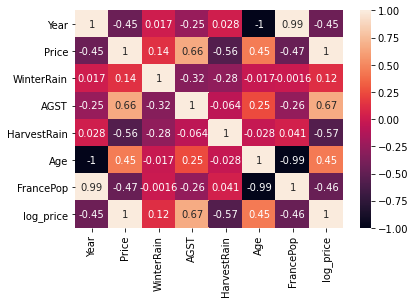

In [8]:
data['log_price']=np.log(data['Price'])
corr = data.corr()
sns.heatmap(corr, vmin=-1, vmax=1,annot=True)

In [9]:
print(data['Price'].skew())
print(data['log_price'].skew())

0.369119560072439
0.21812050635665506


Dans la suite, nous utiliserons donc la transformation logarithmique de la variable à prédire.

><u>Tâche 3</u>. Tracer le logarithme du prix de vente en fonction de
'AGST' d'une part puis de 'HarvestRain'. Qu'en déduisez-vous sur les relations entre ces variables ?

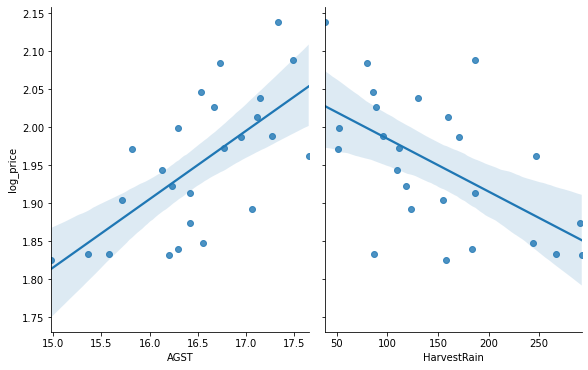

In [10]:
sns.pairplot(data, x_vars=["AGST","HarvestRain"], y_vars=["log_price"],height=5, aspect=.8, kind="reg");

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 2 Régression linéaire simple

><u>Tâche 4</u>. Quel est le modèle *baseline* par défaut (le modèle prédictif construit sans aucune variables explicatives) ? On l'appelle <span style="border:1px; border-style:solid">model0</span>. 
>
>Effectuer une première régression <span style="border:1px; border-style:solid">model1</span> du (logarithme du) prix en fonction de AGST. Utiliser pour cela la fonction <span style="border:1px; border-style:solid">LinearRegressor</span> se trouvant dans <u>sklearn.linear_model</u>. 
>    
> Calculer le RSS pour ce modèle et comparez le au RSS du modèle baseline (il s'agit alors du TSS). 
>
>Déduisez-en le $R^2$ du modèle, et comparez
le à celui qui est fourni par la fonction <span style="border:1px; border-style:solid">r2_score</span> qui se trouve dans <u>sklearn.metrics</u>.
>
> Calculer le residual standard eror (RSE) des deux modèles.

In [10]:
y=data['log_price']

In [11]:
#Modèle baseline
y_pred_baseline=y.mean()
TSS=sum( (y-y_pred_baseline)**2)
print(TSS)

0.19964647667257596


In [12]:
#Modèle 1
regr_simple=LinearRegression()
X_simple=data[['AGST']]
regr_simple.fit(X_simple,y)
print(regr_simple.coef_)
print(regr_simple.intercept_)
y_pred_simple=regr_simple.predict(X_simple)
RSS_simple=sum( (y-y_pred_simple)**2)
print(RSS_simple)

[0.08995136]
0.46641576624792114
0.11106462827059727


In [13]:
R2=1-RSS_simple/TSS
print(R2)

0.44369352206127144


In [14]:
R2_autre=r2_score(y,y_pred_simple)
print(R2_autre)

0.44369352206127133


In [15]:
n=25
p=1

In [16]:
RSE_baseline=np.sqrt( sum((y-y_pred_baseline)**2)/(n-p-1))
print(RSE_baseline/np.mean(y))
print(RSE_baseline)

0.04774290210594527
0.09316802882137104


In [17]:
RSE_simple=np.sqrt( sum((y-y_pred_simple)**2)/(n-p-1))
print(RSE_simple/np.mean(y))
print(RSE_simple)

0.03560949978808607
0.06949026465146263


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 3 Régression linéaire multivariée

><u>Tâche 5</u>. Ajouter la nouvelle variable indépendante 'HarvestRain' pour un nouveau modèle <span style="border:1px; border-style:solid">model2</span>. Considérez la nouvelle valeur du $R^2$ : le modèle est il amélioré, cette variable est-elle significative ? Donner à nouveau la valeur du RSE.

In [18]:
#Modèle 2
p=2
regr_2=LinearRegression()
X_2=data[['AGST','HarvestRain']]
regr_2.fit(X_2,y)
y_pred_2=regr_2.predict(X_2)
R2_2=r2_score(y,y_pred_2)
print(R2_2)
RSE_2=np.sqrt( sum((y-y_pred_2)**2)/(n-p-1))
print(RSE_2)

0.7202985226007073
0.050381009446599165


><u>Tâche 6</u>. Construire maintenant un modèle avec l'ensemble des variables disponibles. Donnez le $R^2$ et le RSE correspondants.

In [19]:
#Modèle 3
p=6
regr_tot=LinearRegression()
X_tot=data[['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop']]
regr_tot.fit(X_tot,y)
y_pred_tot=regr_tot.predict(X_tot)
R2_tot=r2_score(y,y_pred_tot)
print(R2_tot)
RSE_tot=np.sqrt( sum((y-y_pred_tot)**2)/(n-p-1))
print(RSE_tot)

0.8336335773061088
0.042956353900374444


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 4 Recherche de colinéarité

><u>Tâche 7</u>. Les colinarités peuvent impacter négativement les performances du modèle. Repérez-les à l'aide des coefficients de corrélations, des nuages de points et par le raisonnement. Créer un nouveau modèle linéaire sans colinéarité. 

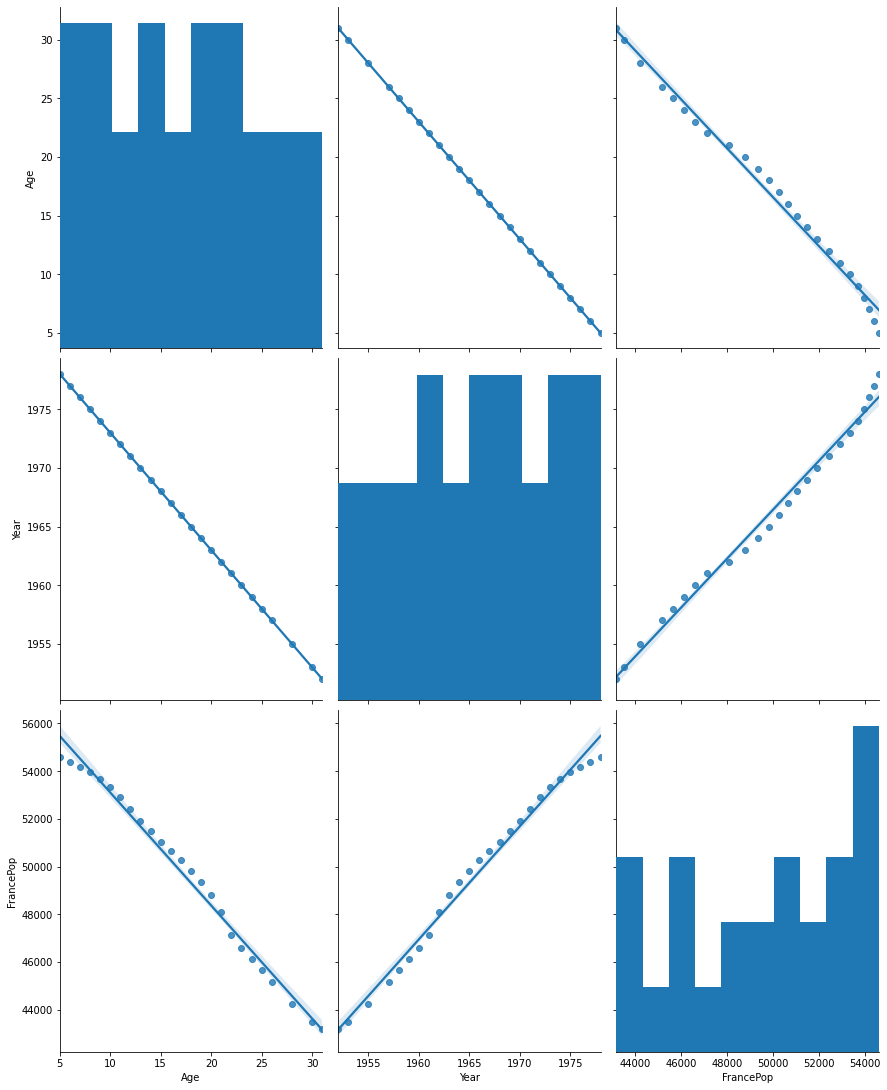

In [20]:
#on a déjà les corrélations
#on trace les nuages de points
sns.pairplot(data[['Age','Year','FrancePop']],height=5, aspect=.8, kind="reg");

><u>Commentaire</u>. La corrélation ainsi que les nuages de points nous montre que ces variables sont fortement colinéaires. C'était également attendu.
>
>On ne garde que l'année pour le modèle linéaire.

In [21]:
#Modèle 4
p=4
regr_col=LinearRegression()
X_col=data[['Year', 'WinterRain', 'AGST', 'HarvestRain']]
regr_col.fit(X_col,y)
y_pred_col=regr_col.predict(X_col)
R2_col=r2_score(y,y_pred_col)
print(R2_col)
RSE_col=np.sqrt( sum((y-y_pred_col)**2)/(n-p-1))
print(RSE_col)

0.832805201480299
0.04085330613453427


><u>Commentaire</u>. L'algorithme de régression linéaire de LinearRegression() est robuste aux multicolinéarités.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 5 Terme d'interaction

><u>Tâche 8</u>. Il est raisonnable de penser que la qualité d'un vin, est donc son prix, peut ếtre impactée par les précipitations hivernales et estivales conjointement. Ajouter au jeu de données la variable 'WinterRain_HarvestRain', produit des variables 'WinterRain' et 'HarvestRain'. Créer le modèle linéaire incluant les variables précédemment sélectionnées et la nouvelle variable d'interaction. Le RSE et le $R^2$ en sont-ils améliorés ?

In [22]:
data['WinterRain_HarvestRain']=data['WinterRain']*data['HarvestRain']

In [23]:
regr_col=LinearRegression()
p=5
X_col=data[['Year', 'WinterRain', 'AGST', 'HarvestRain','WinterRain_HarvestRain']]
regr_col.fit(X_col,y)
y_pred_col=regr_col.predict(X_col)
R2_col=r2_score(y,y_pred_col)
print(R2_col)
RSE_col=np.sqrt( sum((y-y_pred_col)**2)/(n-p-1))
print(RSE_col)

0.8556597745783111
0.03894464184992898


><u>Commentaire</u>. Le modèle est meilleur.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 6 Représentation diagnostic et intervalles de confiance

><u>Tâche 9 : test de l'hypothèse d'homoscédasticité</u>.  Tracer le *residual plot*, c'est-à-dire les résidus obtenus en fonction des valeurs prédites (*fitted*) et conclure quant à l'homoscédasticité du modèle.

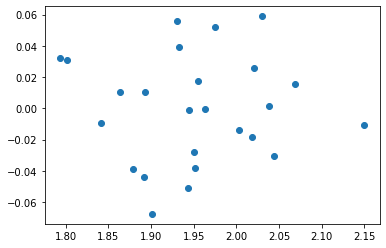

In [24]:
res=(y-y_pred_col)
plt.scatter(y_pred_col, res)

><u>Commentaire</u>. Le residual plot n'a pas de tendance particulière : l'hypothèse d'homoscédasticité est vérifée.

><u>Tâche 10</u>. Afficher l'estimation de l'intercept et des coefficients du modèle linéaire. Donner leur intervalles de confiance à $95$ %.

In [25]:
print(regr_col.intercept_)
print(regr_col.coef_)

8.576634735714347
[-4.09803999e-03  3.55965226e-04  7.78237300e-02  6.19843869e-04
 -1.85089666e-06]


In [26]:
from scipy.stats import t
t.ppf(0.975,19)

2.093024054408263

In [27]:
#terme v_j
X_int=X_col.copy()
X_int.insert(loc=0, column='ones', value=1)
v=np.linalg.inv(X_int.T@X_int)
#estimation de sigma : RSE_col
#quantile de la loi de student : quantile 0.975 à n-p-1 degré de liberté = 25-5-1=19
q=2.09302
#inf
inf=regr_col.coef_-np.sqrt(np.diag(v[1:,1:]))*RSE_col*q
print(inf)
#sup
sup=regr_col.coef_+np.sqrt(np.diag(v[1:,1:]))*RSE_col*q
print(sup)

[-6.52738008e-03  5.83367698e-05  4.90972767e-02 -8.33548491e-04
 -4.08439628e-06]
[-1.66869990e-03  6.53593683e-04  1.06550183e-01  2.07323623e-03
  3.82602957e-07]


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 7 Nouvelles prédictions

><u>Tâche 11</u>. Il s'agit enfin de prédire le prix de vente pour les années 1979 et 1980. Ces données sont
fournies dans le fichier wine_test.csv. Effectuez la prédiction. Comparez ces deux résultats aux valeurs exactes.

In [28]:
test=pd.read_csv('wine_test.csv')
test

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [29]:
test['WinterRain_HarvestRain']=test['WinterRain']*test['HarvestRain']

In [30]:
price_test=regr_col.predict(test[['Year', 'WinterRain', 'AGST', 'HarvestRain','WinterRain_HarvestRain']])

In [31]:
print(price_test)
print(np.exp(price_test))
print(test['Price'])
print(sum((test['Price']-np.exp(price_test))**2))

[1.89370918 1.88014503]
[6.64396668 6.5544554 ]
0    6.9541
1    6.4979
Name: Price, dtype: float64
0.09938118790982556


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## Annexe

Il existe d'autre librairies de régression linéaire en python, avec des méthodes statistiques plus riches.

In [32]:
import statsmodels.api as sm

In [33]:
mod = sm.OLS(y, X_col)
res = mod.fit()
print(res.summary())
print(res.conf_int(0.05))   # 95% confidence interval

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              7756.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                    3.75e-32
Time:                        12:01:33   Log-Likelihood:                          42.416
No. Observations:                  25   AIC:                                     -74.83
Df Residuals:                      20   BIC:                                     -68.74
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>